In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [89]:
number_in_question = "10000000101101"

In [90]:
circuit = QuantumCircuit(len(number_in_question)+1, len(number_in_question))

circuit.h(range(len(number_in_question)))
circuit.x(len(number_in_question))
circuit.h(len(number_in_question))


circuit.barrier()

for ii, yesno in enumerate(reversed(number_in_question)):
    if yesno == '1':
        circuit.cx(ii, len(number_in_question))


circuit.barrier()

circuit.h(range(len(number_in_question)))
circuit.barrier()
circuit.measure(range(len(number_in_question)), range(len(number_in_question)))


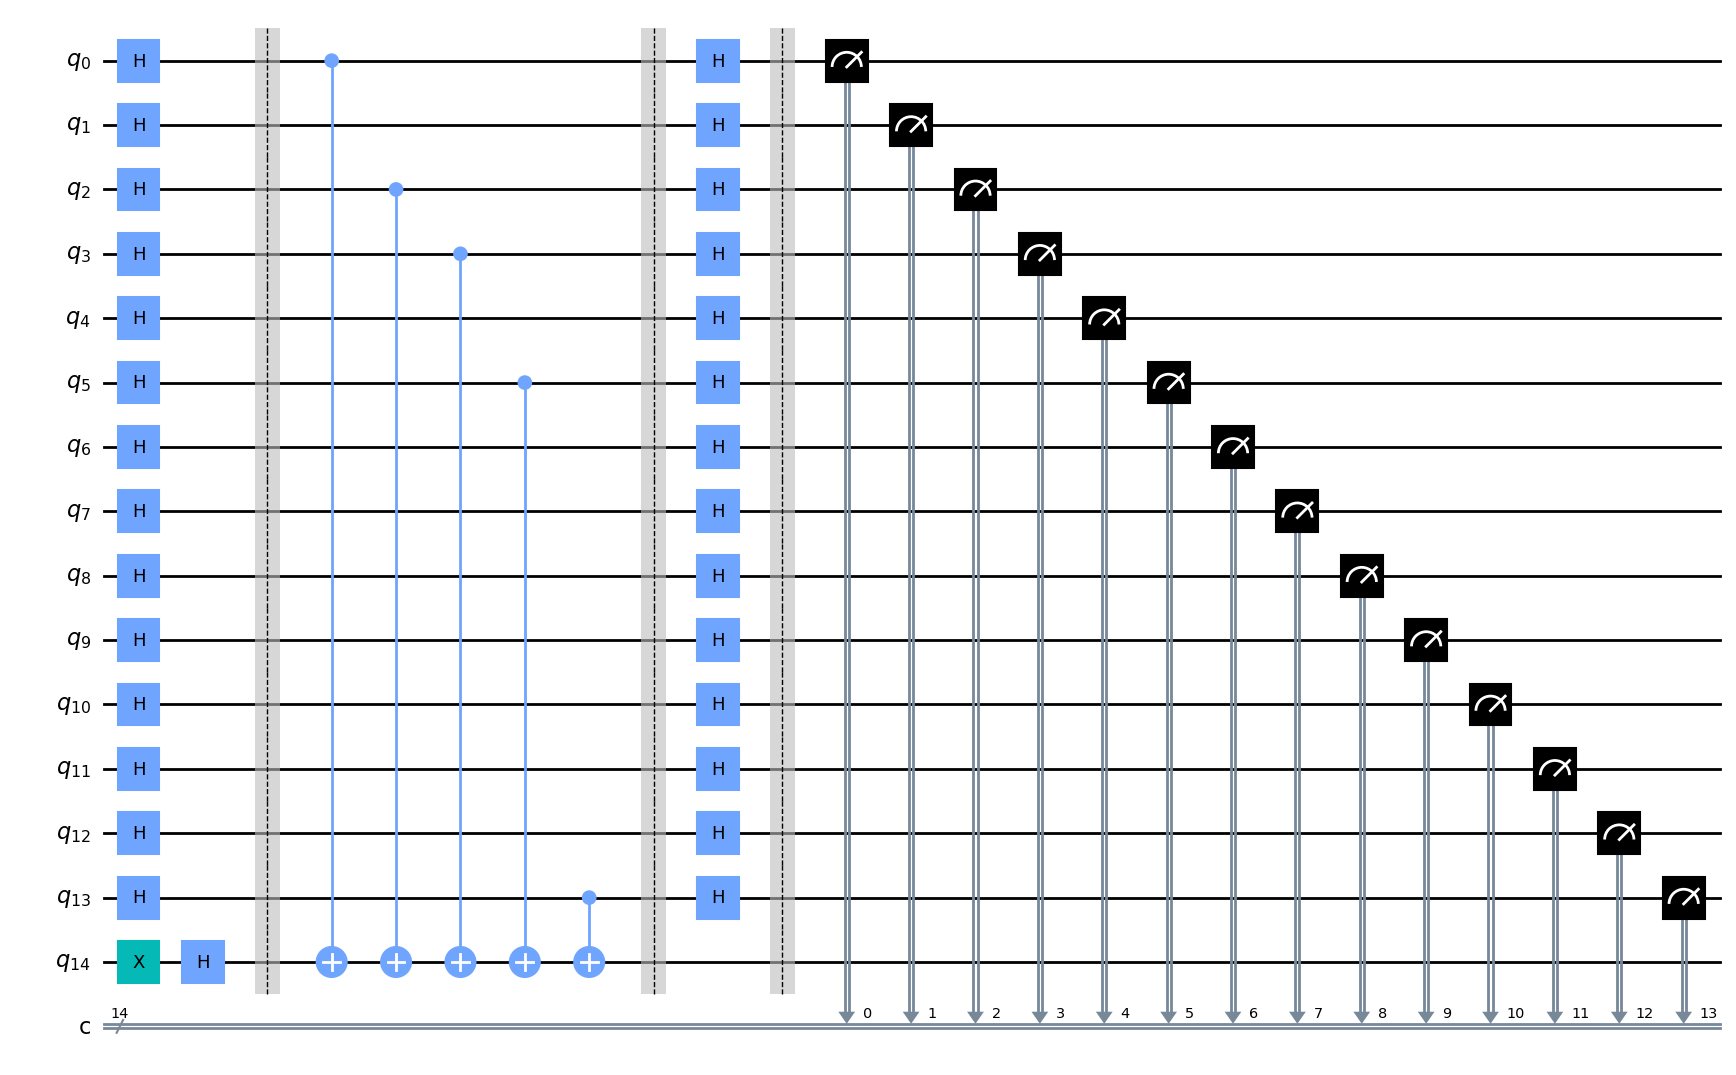

In [91]:
circuit.draw(output='mpl')

In [92]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'10000000101101': 1}


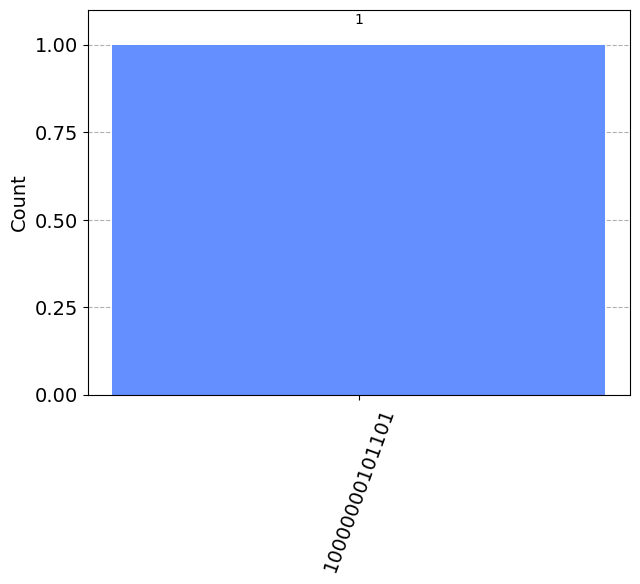

In [93]:
plot_histogram(counts)

In [94]:
result_num = list(counts.keys())[0]

In [95]:
print(f"Your number is: {int(result_num, 2)}")

Your number is: 8237
